In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from synapse_solver import SynapseModel

In [22]:
tend = 100
t = np.geomspace(1e-10, tend, 64)

param_dict = {'kon' : 1e5,
          'koff': 1e-4,
          'qon': 6.5e3,
          'qoff': 4.7e-3,
          'rtot_t': 1e5,
          'rtot_f': 2.2e5,
          'delta2': 100,
          'delta4': 100,
          'delta7': 100,
          'timesteps': t,
          'tend': tend}

rtot_t_vals = [1e4, 5e4, 1e5, 5e5, 1e6]
rtot_f_vals = [1e4, 5e4, 1e5, 5e5, 1e6]

solver = SynapseModel(param_dict)

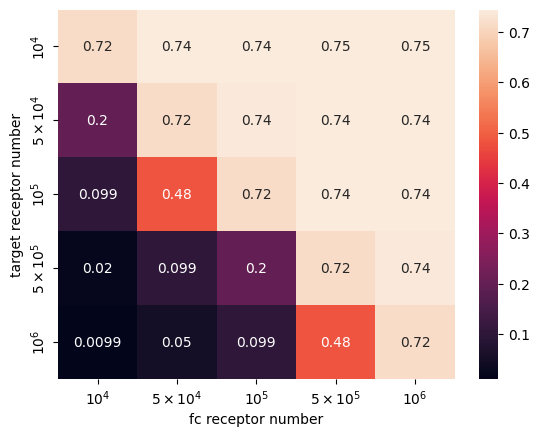

In [23]:
Y = np.zeros((len(rtot_t_vals), len(rtot_f_vals)))
A0 = 1e-5
for i in range(len(rtot_t_vals)):
    param_dict['rtot_t'] = rtot_t_vals[i]
    for j in range(len(rtot_f_vals)):
        param_dict['rtot_f'] = rtot_f_vals[j]
        solver.set_params(param_dict)
        Y[i][j] = solver.calc_fc(A0)

fig, ax = plt.subplots()
sns.heatmap(Y, annot=True, yticklabels=True, xticklabels=True, ax=ax)
ax.set_xticklabels([r'$10^4$', r'$5 \times 10^4$', r'$10^5$', r'$5 \times 10^5$', r'$10^6$'])
ax.set_yticklabels([r'$10^4$', r'$5 \times 10^4$', r'$10^5$', r'$5 \times 10^5$', r'$10^6$'])
ax.set_ylabel('target receptor number')
ax.set_xlabel('fc receptor number')
plt.show()

In [39]:
import math
from scipy.constants import N_A
(1/1)*(10**5)*(1.25e8)*(6.022e-23)/(2*math.pi*((8e-6)**2))

1.8719356783191288

In [48]:
2.2e5*(4*math.pi*((3e-6)**2))*(1/N_A)/((2/3)*math.pi*((1.25e-8)**3))

1.2625410635536192e-06

In [49]:
(1e5)*(4*math.pi*((8*(10**-6))**2))*(1/N_A)/((1/3)*math.pi*((1.25*(10**-8))**3))

6.529505298378314e-05

In [43]:
2.2e5*(4*math.pi*((3e-6)**2))*(1/N_A)/(math.pi*((2*1.25e-8)**2)*1.25e-8)

1.6833880847381592e-06